## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import xgboost
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

%matplotlib inline
warnings.filterwarnings(action='ignore')

## 데이터 전처리

In [2]:
# 공격지표 스탯
epl_offense_stat = pd.read_csv('file/offense/[Modify]England-Premier-League-2021-2022_PlayerStatistics_offense.csv')
ligue1_offense_stat = pd.read_csv('file/offense/[Modify]France-Ligue-1-2021-2022_PlayerStatistics_offense.csv')
bundesliga_offense_stat = pd.read_csv('file/offense/[Modify]Germany-Bundesliga-2021-2022_PlayerStatistics_offense.csv')
seriaA_offense_stat = pd.read_csv('file/offense/[Modify]Italy-Serie-A-2021-2022_PlayerStatistics_offense.csv')
laliga_offense_stat = pd.read_csv('file/offense/[Modify]Spain-LaLiga-2021-2022_PlayerStatistics_offense.csv')

In [3]:
# 수비지표 스탯
epl_defense_stat = pd.read_csv('file/defense/[Modify]England-Premier-League-2021-2022_PlayerStatistics_defense.csv')
ligue1_defense_stat = pd.read_csv('file/defense/[Modify]France-Ligue-1-2021-2022_PlayerStatistics_defense.csv')
bundesliga_defense_stat = pd.read_csv('file/defense/[Modify]Germany-Bundesliga-2021-2022_PlayerStatistics_defense.csv')
seriaA_defense_stat = pd.read_csv('file/defense/[Modify]Italy-Serie-A-2021-2022_PlayerStatistics_defense.csv')
laliga_defense_stat = pd.read_csv('file/defense/[Modify]Spain-LaLiga-2021-2022_PlayerStatistics_defense.csv')

In [4]:
# 패스지표 스탯
epl_passing_stat = pd.read_csv('file/passing/[Modify]fileEngland-Premier-League-2021-2022_PlayerStatistics_passing.csv')

In [5]:
# 패스지표 첫 열 삭제 (인덱스 열)
epl_passing_stat = epl_passing_stat.iloc[:, 1:]

In [6]:
# 수비지표 첫 열 삭제 (인덱스 열)
epl_defense_stat = epl_defense_stat.iloc[:, 1:]
ligue1_defense_stat = ligue1_defense_stat.iloc[:, 1:]
bundesliga_defense_stat = bundesliga_defense_stat.iloc[:, 1:]
seriaA_defense_stat = seriaA_defense_stat.iloc[:, 1:]
laliga_defense_stat = laliga_defense_stat.iloc[:, 1:]

In [7]:
# market value 데이터셋

epl_marketvalue = pd.read_csv('file/marketvalue/[Modify]England-Premier-League-2021-2022_PlayerStatistics_Marketvalue.csv')
ligue1_marketvalue = pd.read_csv('file/marketvalue/[Modify]France-Ligue-1-2021-2022_PlayerStatistics_Marketvalue.csv')
bundesliga_marketvalue = pd.read_csv('file/marketvalue/[Modify]Germany-Bundesliga-2021-2022_PlayerStatistics_Marketvalue.csv')
seriaA_marketvalue = pd.read_csv('file/marketvalue/[Modify]Italy-Serie-A-2021-2022_PlayerStatistics_Marketvalue.csv')
laliga_marketvalue = pd.read_csv('file/marketvalue/[Modify]Spain-LaLiga-2021-2022_PlayerStatistics_Marketvalue.csv')


In [8]:
# market vlaue 데이터셋 수치형으로 환산

def func(x) :
    if 'm' in x :
        return 1000000
    else :
        return 1000
    
epl_marketvalue["exchange"] = epl_marketvalue['Market value'].apply(lambda x : func(x))
ligue1_marketvalue["exchange"] = ligue1_marketvalue['Market value'].apply(lambda x : func(x))
bundesliga_marketvalue["exchange"] = bundesliga_marketvalue['Market value'].apply(lambda x : func(x))
seriaA_marketvalue["exchange"] = seriaA_marketvalue['Market value'].apply(lambda x : func(x))
laliga_marketvalue["exchange"] = laliga_marketvalue['Market value'].apply(lambda x : func(x))

# 첫 열 삭제 (인덱스 열)
epl_marketvalue = epl_marketvalue.iloc[:, 1:]
ligue1_marketvalue = ligue1_marketvalue.iloc[:, 1:]
bundesliga_marketvalue = bundesliga_marketvalue.iloc[:, 1:]
seriaA_marketvalue = seriaA_marketvalue.iloc[:, 1:]
laliga_marketvalue = laliga_marketvalue.iloc[:, 1:]

# 유로 단위 삭제 
epl_marketvalue['Market value'] = epl_marketvalue['Market value'].apply(lambda x : x.replace("€",""))
epl_marketvalue['Market value'] = epl_marketvalue['Market value'].apply(lambda x : x.replace("Th.",""))
epl_marketvalue['Market value'] = epl_marketvalue['Market value'].apply(lambda x : x.replace("m",""))
epl_marketvalue['Market value'] = epl_marketvalue['Market value'].astype('float')
epl_marketvalue['Market value'] = epl_marketvalue['Market value'] * epl_marketvalue['exchange']

ligue1_marketvalue['Market value'] = ligue1_marketvalue['Market value'].apply(lambda x : x.replace("€",""))
ligue1_marketvalue['Market value'] = ligue1_marketvalue['Market value'].apply(lambda x : x.replace("Th.",""))
ligue1_marketvalue['Market value'] = ligue1_marketvalue['Market value'].apply(lambda x : x.replace("m",""))
ligue1_marketvalue['Market value'] = ligue1_marketvalue['Market value'].astype('float')
ligue1_marketvalue['Market value'] = ligue1_marketvalue['Market value'] * ligue1_marketvalue['exchange']

bundesliga_marketvalue['Market value'] = bundesliga_marketvalue['Market value'].apply(lambda x : x.replace("€",""))
bundesliga_marketvalue['Market value'] = bundesliga_marketvalue['Market value'].apply(lambda x : x.replace("Th.",""))
bundesliga_marketvalue['Market value'] = bundesliga_marketvalue['Market value'].apply(lambda x : x.replace("m",""))
bundesliga_marketvalue['Market value'] = bundesliga_marketvalue['Market value'].astype('float')
bundesliga_marketvalue['Market value'] = bundesliga_marketvalue['Market value'] * bundesliga_marketvalue['exchange']

seriaA_marketvalue['Market value'] = seriaA_marketvalue['Market value'].apply(lambda x : x.replace("€",""))
seriaA_marketvalue['Market value'] = seriaA_marketvalue['Market value'].apply(lambda x : x.replace("Th.",""))
seriaA_marketvalue['Market value'] = seriaA_marketvalue['Market value'].apply(lambda x : x.replace("m",""))
seriaA_marketvalue['Market value'] = seriaA_marketvalue['Market value'].astype('float')
seriaA_marketvalue['Market value'] = seriaA_marketvalue['Market value'] * seriaA_marketvalue['exchange']

laliga_marketvalue['Market value'] = laliga_marketvalue['Market value'].apply(lambda x : x.replace("€",""))
laliga_marketvalue['Market value'] = laliga_marketvalue['Market value'].apply(lambda x : x.replace("Th.",""))
laliga_marketvalue['Market value'] = laliga_marketvalue['Market value'].apply(lambda x : x.replace("m",""))
laliga_marketvalue['Market value'] = laliga_marketvalue['Market value'].astype('float')
laliga_marketvalue['Market value'] = laliga_marketvalue['Market value'] * laliga_marketvalue['exchange']

In [46]:
# Name(이름)을 기준으로 데이터를 inner join
merge_offense_epl = pd.merge(epl_marketvalue,epl_offense_stat, how='inner',on='Name')
merge_offense_ligue1 = pd.merge(ligue1_marketvalue,ligue1_offense_stat, how='inner',on='Name')
merge_offense_bundesliga = pd.merge(bundesliga_marketvalue,bundesliga_offense_stat, how='inner',on='Name')
merge_offense_seriaA = pd.merge(seriaA_marketvalue,seriaA_offense_stat, how='inner',on='Name')
merge_offense_laliga = pd.merge(laliga_marketvalue,laliga_offense_stat, how='inner',on='Name')

merge_defense_epl = pd.merge(epl_marketvalue,epl_defense_stat, how='inner',on='Name')
merge_defense_ligue1 = pd.merge(ligue1_marketvalue,ligue1_defense_stat, how='inner',on='Name')
merge_defense_bundesliga = pd.merge(bundesliga_marketvalue,bundesliga_defense_stat, how='inner',on='Name')
merge_defense_seriaA = pd.merge(seriaA_marketvalue,seriaA_defense_stat, how='inner',on='Name')
merge_defense_laliga = pd.merge(laliga_marketvalue,laliga_defense_stat, how='inner',on='Name')

merge_passing_epl = pd.merge(epl_marketvalue,epl_passing_stat, how='inner',on='Name')

In [47]:
# 포지션 대분류만 사용
merge_offense_epl = merge_offense_epl.dropna(axis = 1)
merge_offense_ligue1 = merge_offense_ligue1.dropna(axis = 1)
merge_offense_bundesliga = merge_offense_bundesliga.dropna(axis = 1)
merge_offense_seriaA = merge_offense_seriaA.dropna(axis = 1)
merge_offense_laliga = merge_offense_laliga.dropna(axis = 1)

merge_defense_epl = merge_defense_epl.dropna(axis = 1)
merge_defense_ligue1 = merge_defense_ligue1.dropna(axis = 1)
merge_defense_bundesliga = merge_defense_bundesliga.dropna(axis = 1)
merge_defense_seriaA = merge_defense_seriaA.dropna(axis = 1)
merge_defense_laliga = merge_defense_laliga.dropna(axis = 1)

merge_passing_epl = merge_passing_epl.dropna(axis = 1)

In [48]:
"""

position 열에서 해당 문자가 들어간 값들은 각각의 포지션별로 구분해준다.
이때 데이터셋이 주로 필드플레이어를 위한 데이터이기 때문에 골키퍼는 nan으로 
처리하여 데이터를 소거해주도록 하겠다.

"""


def position_def(x) :
    if 'D' in x :
        return 'Defender'
    elif 'G' in x :
        return np.nan
    elif 'F' in x :
        return 'Foward'
    else :
        return 'Midfielders'

In [49]:
# position 변환 lambda 함수 적용

merge_offense_epl["position1"] = merge_offense_epl['position1'].apply(lambda x : position_def(x))
merge_offense_ligue1["position1"] = merge_offense_ligue1['position1'].apply(lambda x : position_def(x))
merge_offense_bundesliga["position1"] = merge_offense_bundesliga['position1'].apply(lambda x : position_def(x))
merge_offense_seriaA["position1"] = merge_offense_seriaA['position1'].apply(lambda x : position_def(x))
merge_offense_laliga["position1"] = merge_offense_laliga['position1'].apply(lambda x : position_def(x))

merge_defense_epl["position1"] = merge_defense_epl['position1'].apply(lambda x : position_def(x))
merge_defense_ligue1["position1"] = merge_defense_ligue1['position1'].apply(lambda x : position_def(x))
merge_defense_bundesliga["position1"] = merge_defense_bundesliga['position1'].apply(lambda x : position_def(x))
merge_defense_seriaA["position1"] = merge_defense_seriaA['position1'].apply(lambda x : position_def(x))
merge_defense_laliga["position1"] = merge_defense_laliga['position1'].apply(lambda x : position_def(x))

merge_passing_epl["position1"] = merge_passing_epl['position1'].apply(lambda x : position_def(x))

In [50]:
# position에 NaN이 새롭게 발생했으므로 다시 dropna 함수 적용
merge_offense_epl = merge_offense_epl.dropna(axis = 0)
merge_offense_ligue1 = merge_offense_ligue1.dropna(axis = 0)
merge_offense_bundesliga = merge_offense_bundesliga.dropna(axis = 0)
merge_offense_seriaA = merge_offense_seriaA.dropna(axis = 0)
merge_offense_laliga = merge_offense_laliga.dropna(axis = 0)

merge_defense_epl = merge_defense_epl.dropna(axis = 0)
merge_defense_ligue1 = merge_defense_ligue1.dropna(axis = 0)
merge_defense_bundesliga = merge_defense_bundesliga.dropna(axis = 0)
merge_defense_seriaA = merge_defense_seriaA.dropna(axis = 0)
merge_defense_laliga = merge_defense_laliga.dropna(axis = 0)

merge_passing_epl = merge_passing_epl.dropna(axis = 0)

In [51]:
# 자책골 비율은 매우 낮아 모델 성능에 좋지 않기 때문에 own goal 열을 삭제하겠다.

merge_defense_epl = merge_defense_epl.drop(['OwnG'], axis=1)
merge_defense_ligue1 = merge_defense_ligue1.drop(['OwnG'], axis=1)
merge_defense_bundesliga = merge_defense_bundesliga.drop(['OwnG'], axis=1)
merge_defense_seriaA = merge_defense_seriaA.drop(['OwnG'], axis=1)
merge_defense_laliga = merge_defense_laliga.drop(['OwnG'], axis=1)

In [52]:
"""
Apps 데이터의 괄호 부분은 교체출전이다.
교체출전과 선발출전을 합쳐서 표현하도록 하겠다.
또한 값이 '-'로 되어 있는 것은 0으로 치환하겠다.

"""
# 공격지표 데이터 변환
merge_offense_epl['Starting'] = merge_offense_epl['Apps'].str.split("(", expand=True)[0].astype("int")
merge_offense_epl['Sub'] = merge_offense_epl['Apps'].str.split("(", expand=True)[1]
merge_offense_epl['Sub'] = merge_offense_epl['Sub'].fillna("0")
merge_offense_epl['Sub'] = merge_offense_epl['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_offense_epl = merge_offense_epl.replace('-', '0')
merge_offense_epl['Apperance'] = merge_offense_epl['Starting'] + merge_offense_epl['Sub']

merge_offense_ligue1['Starting'] = merge_offense_ligue1['Apps'].str.split("(", expand=True)[0].astype("int")
merge_offense_ligue1['Sub'] = merge_offense_ligue1['Apps'].str.split("(", expand=True)[1]
merge_offense_ligue1['Sub'] = merge_offense_ligue1['Sub'].fillna("0")
merge_offense_ligue1['Sub'] = merge_offense_ligue1['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_offense_ligue1 = merge_offense_ligue1.replace('-', '0')
merge_offense_ligue1['Apperance'] = merge_offense_ligue1['Starting'] + merge_offense_ligue1['Sub']

merge_offense_bundesliga['Starting'] = merge_offense_bundesliga['Apps'].str.split("(", expand=True)[0].astype("int")
merge_offense_bundesliga['Sub'] = merge_offense_bundesliga['Apps'].str.split("(", expand=True)[1]
merge_offense_bundesliga['Sub'] = merge_offense_bundesliga['Sub'].fillna("0")
merge_offense_bundesliga['Sub'] = merge_offense_bundesliga['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_offense_bundesliga = merge_offense_bundesliga.replace('-', '0')
merge_offense_bundesliga['Apperance'] = merge_offense_bundesliga['Starting'] + merge_offense_bundesliga['Sub']

merge_offense_seriaA['Starting'] = merge_offense_seriaA['Apps'].str.split("(", expand=True)[0].astype("int")
merge_offense_seriaA['Sub'] = merge_offense_seriaA['Apps'].str.split("(", expand=True)[1]
merge_offense_seriaA['Sub'] = merge_offense_seriaA['Sub'].fillna("0")
merge_offense_seriaA['Sub'] = merge_offense_seriaA['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_offense_seriaA = merge_offense_seriaA.replace('-', '0')
merge_offense_seriaA['Apperance'] = merge_offense_seriaA['Starting'] + merge_offense_seriaA['Sub']

merge_offense_laliga['Starting'] = merge_offense_laliga['Apps'].str.split("(", expand=True)[0].astype("int")
merge_offense_laliga['Sub'] = merge_offense_laliga['Apps'].str.split("(", expand=True)[1]
merge_offense_laliga['Sub'] = merge_offense_laliga['Sub'].fillna("0")
merge_offense_laliga['Sub'] = merge_offense_laliga['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_offense_laliga = merge_offense_laliga.replace('-', '0')
merge_offense_laliga['Apperance'] = merge_offense_laliga['Starting'] + merge_offense_laliga['Sub']


# 수비지표 데이터 변환
merge_defense_epl['Starting'] = merge_defense_epl['Apps'].str.split("(", expand=True)[0].astype("int")
merge_defense_epl['Sub'] = merge_defense_epl['Apps'].str.split("(", expand=True)[1]
merge_defense_epl['Sub'] = merge_defense_epl['Sub'].fillna("0")
merge_defense_epl['Sub'] = merge_defense_epl['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_defense_epl = merge_defense_epl.replace('-', '0')
merge_defense_epl['Apperance'] = merge_defense_epl['Starting'] + merge_defense_epl['Sub']

merge_defense_ligue1['Starting'] = merge_defense_ligue1['Apps'].str.split("(", expand=True)[0].astype("int")
merge_defense_ligue1['Sub'] = merge_defense_ligue1['Apps'].str.split("(", expand=True)[1]
merge_defense_ligue1['Sub'] = merge_defense_ligue1['Sub'].fillna("0")
merge_defense_ligue1['Sub'] = merge_defense_ligue1['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_defense_ligue1 = merge_defense_ligue1.replace('-', '0')
merge_defense_ligue1['Apperance'] = merge_defense_ligue1['Starting'] + merge_defense_ligue1['Sub']

merge_defense_bundesliga['Starting'] = merge_defense_bundesliga['Apps'].str.split("(", expand=True)[0].astype("int")
merge_defense_bundesliga['Sub'] = merge_defense_bundesliga['Apps'].str.split("(", expand=True)[1]
merge_defense_bundesliga['Sub'] = merge_defense_bundesliga['Sub'].fillna("0")
merge_defense_bundesliga['Sub'] = merge_defense_bundesliga['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_defense_bundesliga = merge_defense_bundesliga.replace('-', '0')
merge_defense_bundesliga['Apperance'] = merge_defense_bundesliga['Starting'] + merge_defense_bundesliga['Sub']

merge_defense_seriaA['Starting'] = merge_defense_seriaA['Apps'].str.split("(", expand=True)[0].astype("int")
merge_defense_seriaA['Sub'] = merge_defense_seriaA['Apps'].str.split("(", expand=True)[1]
merge_defense_seriaA['Sub'] = merge_defense_seriaA['Sub'].fillna("0")
merge_defense_seriaA['Sub'] = merge_defense_seriaA['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_defense_seriaA = merge_defense_seriaA.replace('-', '0')
merge_defense_seriaA['Apperance'] = merge_defense_seriaA['Starting'] + merge_defense_seriaA['Sub']

merge_defense_laliga['Starting'] = merge_defense_laliga['Apps'].str.split("(", expand=True)[0].astype("int")
merge_defense_laliga['Sub'] = merge_defense_laliga['Apps'].str.split("(", expand=True)[1]
merge_defense_laliga['Sub'] = merge_defense_laliga['Sub'].fillna("0")
merge_defense_laliga['Sub'] = merge_defense_laliga['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_defense_laliga = merge_defense_laliga.replace('-', '0')
merge_defense_laliga['Apperance'] = merge_defense_laliga['Starting'] + merge_defense_laliga['Sub']

# 패싱지표 데이터
merge_passing_epl['Starting'] = merge_passing_epl['Apps'].str.split("(", expand=True)[0].astype("int")
merge_passing_epl['Sub'] = merge_passing_epl['Apps'].str.split("(", expand=True)[1]
merge_passing_epl['Sub'] = merge_passing_epl['Sub'].fillna("0")
merge_passing_epl['Sub'] = merge_passing_epl['Sub'].apply(lambda x : x.replace(")","")).astype("int")
merge_passing_epl = merge_passing_epl.replace('-', '0')
merge_passing_epl['Apperance'] = merge_passing_epl['Starting'] + merge_passing_epl['Sub']

In [53]:
# 5대리그 데이터셋 합치기

df_offense = pd.concat([merge_offense_epl, merge_offense_ligue1,
               merge_offense_bundesliga, merge_offense_seriaA, merge_offense_laliga])

df_defense = pd.concat([merge_defense_epl, merge_defense_ligue1,
               merge_defense_bundesliga, merge_defense_seriaA, merge_defense_laliga])


## 손흥민 EDA

대분류 상으로는 손흥민 선수는 미드필더이다. 공격수 + 미드필더 평균 데이터와 손흥민 선수와의 비교해보도록 하겠다.

In [65]:
son = df_offense[df_offense['Name'] == 'Son Heung-Min']

not_son = df_offense[df_offense['Name'] != 'Son Heung-Min']
not_son_midfielders = df_offense[(df_offense['position1'] == 'Midfielders')]
not_son_foward = df_offense[(df_offense['position1'] == 'Foward')]

In [130]:
son_stat = son.drop(['Name', 'Apps', 'position1', 'exchange'], axis=1)
not_son_midfielders_stat = not_son_midfielders.drop(['Name', 'Apps', 'position1', 'exchange'], axis=1)
not_son_foward_stat = not_son_foward.drop(['Name', 'Apps', 'position1', 'exchange'], axis=1)

son_stat = son_stat.astype('float')
not_son_midfielders_stat = not_son_midfielders_stat.astype('float')
not_son_foward_stat = not_son_foward_stat.astype('float')

In [131]:
son_list = []
not_son_mid_list = []
not_son_fw_list = []

for i in not_son_midfielders_stat.mean():
    not_son_mid_list.append(i)

for i in not_son_foward_stat.mean():
    not_son_fw_list.append(i)
    
for i in son_stat.mean():
    son_list.append(i)

손흥민 선수는 공격쪽 모든 지표에서 전체 선수의 평균치를 앞서고 있다.

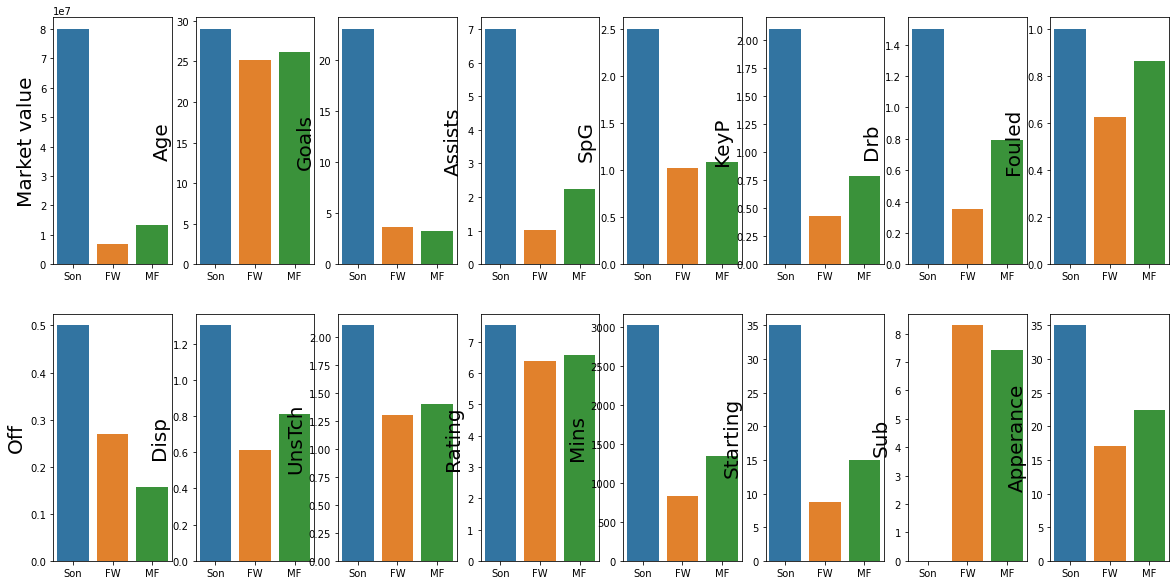

In [142]:
fig, axs = plt.subplots(figsize =(20, 10), ncols = 8, nrows = 2)
for i in range(0, 16, 1):
    row = int(i/8)
    col = i%8
    group = ['Son', 'FW', 'MF']
    values = [son_list[i], not_son_fw_list[i], not_son_mid_list[i]]
    p = sns.barplot(group, values, ax = axs[row][col])
    p.set_ylabel(son_stat.columns[i], fontsize = 20)

선수 가치(종속변수)는 매우 Left skewed된 분포를 보이고 있다.
그렇기 때문에 지나치게 선수 가치가 높은 데이터는 outlier로 판단하여 소거하도록 하겠다.


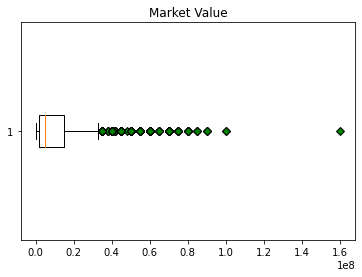

In [21]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df_offense['Market value'], flierprops=green_diamond, vert=False)
plt.title("Market Value")
plt.show()

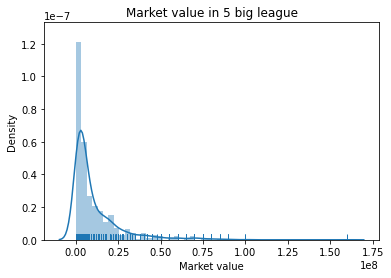

In [22]:
sns.distplot(df_offense['Market value'], kde=True, rug=True)
plt.title("Market value in 5 big league")
plt.show()

In [23]:
# 이상치 제거 함수 구현
# 이상치는 위 box plot에서 (Q1 – 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR) 보다 큰 데이터로 하겠다.

def remove_out(dataframe, remove_col):
    dff = dataframe
    level_1q = dff[remove_col].quantile(0.25)
    level_3q = dff[remove_col].quantile(0.75)
    IQR = level_3q - level_1q
    rev_range = 3  # 제거 범위 조절 변수
    dff = dff[(dff[remove_col] <= level_3q + (rev_range * IQR)) & (dff[remove_col] >= level_1q - (rev_range * IQR))]
    dff = dff.reset_index(drop=True)
    return dff

In [24]:
df_offense = remove_out(df_offense, 'Market value')
df_defense = remove_out(df_defense, 'Market value')

In [25]:
# 선수 개인 사정으로 인해 개인 몸값이 말소가 된 경우는 제거하도록 하겠다.
not_zero_offense = df_offense['Market value'] != 0
not_zero_defense = df_defense['Market value'] != 0

df_offense = df_offense[not_zero_offense]
df_defense = df_defense[not_zero_defense]

현재 확보된 데이터셋은 공격 지표와 수비 지표이다.
당연하게도 공격수와 미드필더는 공격 관련 지표가 우수하고
반대로 수비수는 수비 관련 지표가 우수하다.
이를 반영하여 공격지표 데이터에는 공격수와 미드필더만 남기고 수비지표 데이터에는 수비수만 남기어 모델 정확도를 향상시키도록 하겠다.

In [26]:
def defense_selection(x) :
    if 'Defender' in x :
        return 'Defender'
    else :
        return np.nan

def offense_selection(x) :
    if 'Foward' in x :
        return 'Foward'
    elif 'Midfielders' in x :
        return 'Midfielders'
    else :
        return np.nan

In [27]:
df_offense["position1"] = df_offense['position1'].apply(lambda x : offense_selection(x))
df_defense["position1"] = df_defense['position1'].apply(lambda x : defense_selection(x))

df_offense = df_offense.dropna(axis = 0)
df_defense = df_defense.dropna(axis = 0)

공격 지표 상관계수

<AxesSubplot:>

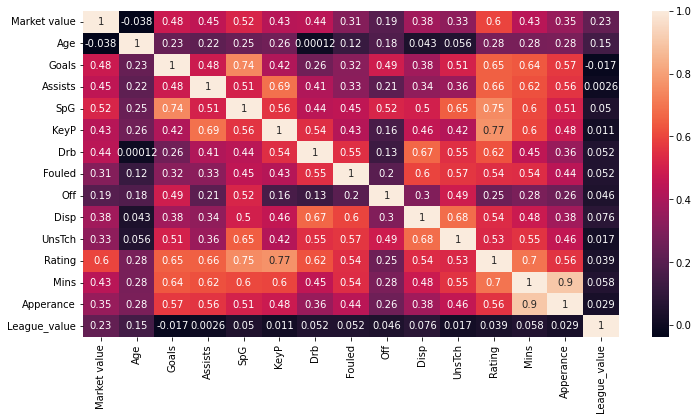

In [28]:
corr_df = df_offense.iloc[:, 1:]
corr_df = corr_df.drop(['position1'], axis=1)
corr_df = corr_df.drop(['Apps'], axis=1)
corr_df = corr_df.drop(['Starting'], axis=1)
corr_df = corr_df.drop(['Sub'], axis=1)
corr_df = corr_df.drop(['exchange'], axis=1)
corr_df = corr_df.astype('float')

plt.figure(figsize=(12,6))
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cbar=True)

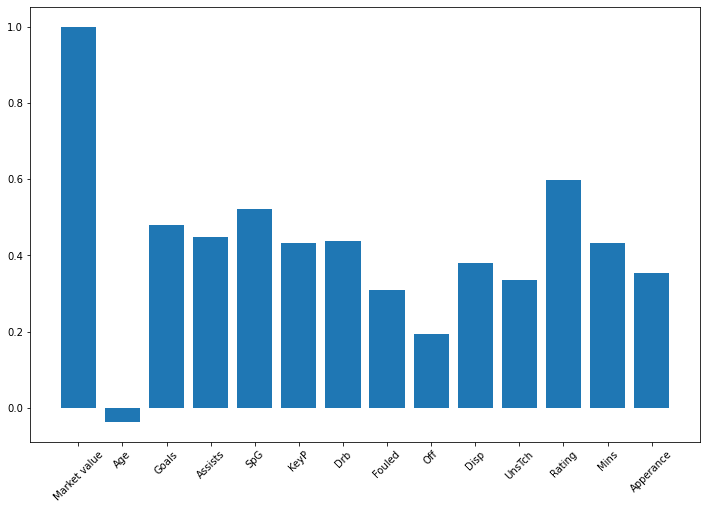

In [1629]:
plt.figure(figsize=(12,8))
plt.bar(corr.index, corr["Market value"])
plt.xticks(rotation=45)
plt.show()

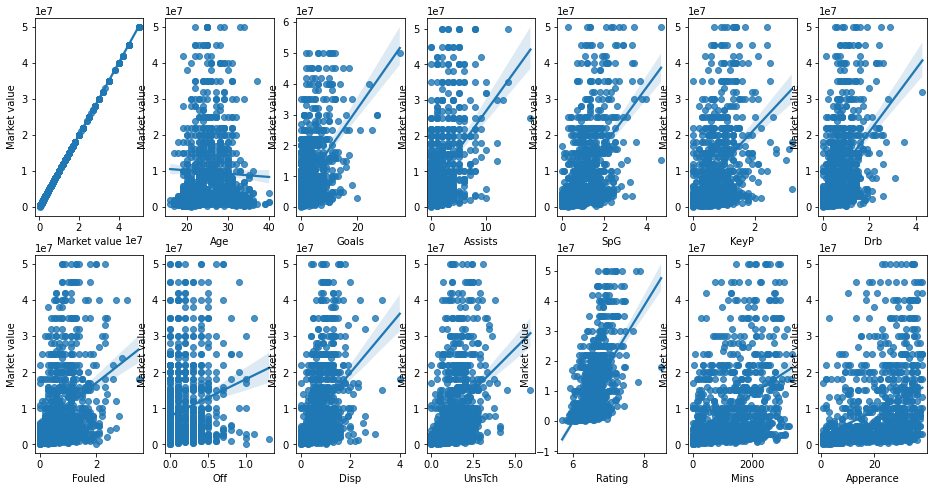

In [1630]:
fig, axs = plt.subplots(figsize =(16, 8), ncols = 7, nrows = 2)
for i, feature in enumerate(corr.index):
    row = int(i/7)
    col = i%7
    sns.regplot(data = corr_df, x = feature, y = 'Market value', ax = axs[row][col])

위의 Corr 그래프를 통해 다중공선성이 의심되는 변수들을 육안으로 확인하였고, 실제 VIF 지수를 통해 VIF가 10 이상인 변수 여럿을 찾았다.

In [1631]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
            for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(corr_df)
print(vif)

    VIF_Factor       Feature
0     3.110911  Market value
1    44.609109           Age
2     4.641705         Goals
3     3.843344       Assists
4    10.946638           SpG
5     7.440269          KeyP
6     6.021904           Drb
7     6.041113        Fouled
8     2.843515           Off
9     8.461807          Disp
10   11.811154        UnsTch
11   52.564608        Rating
12   23.053767          Mins
13   27.403896     Apperance


수비 지표 상관계수

수비수들의 지표와 Market value와의 상관계수가 매우 낮음을 확인할 수 있었다.

<AxesSubplot:>

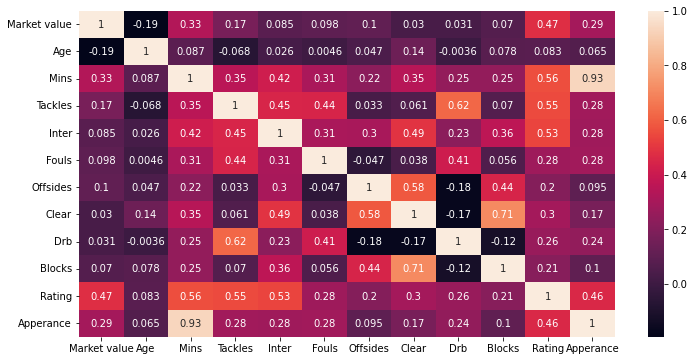

In [1632]:
corr_df = df_defense.iloc[:, 1:]
corr_df = corr_df.drop(['position1'], axis=1)
corr_df = corr_df.drop(['Apps'], axis=1)
corr_df = corr_df.drop(['Starting'], axis=1)
corr_df = corr_df.drop(['Sub'], axis=1)
corr_df = corr_df.drop(['exchange'], axis=1)
corr_df = corr_df.astype('float')

plt.figure(figsize=(12,6))
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cbar=True)

In [1584]:
# df_offense_1m = df_offense[df_offense['Market value'] <= 10000000]

## 단계별 선택법

Feature selection의 방법으로 단계별 선택법을 선정하였다.

In [1667]:
x = df_offense[['Age', 'Goals', 'Assists', 'SpG', 'KeyP', 'Drb', 'Fouled', 
                'Disp', 'Rating', 'Mins', 'Apperance', 'Market value']]

In [1711]:
len(x)

1024

In [1634]:
x = x.astype('float')

In [1653]:
## 단계별 선택법
variables = x.columns[:-1].tolist() ## 설명 변수 리스트
 
y = x['Market value'] ## 반응 변수

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = x[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = x[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(x[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [1654]:
selected_variables = selected_variables[1:]
selected_variables

['Age', 'Goals', 'Assists', 'SpG', 'Drb']

## Scaler

In [1696]:
X = x[['Rating','Age','Goals', 'Assists', 'SpG', 'Drb']]

y = x[['Market value']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [1697]:
scaler = RobustScaler()

y_train_values = y_train.values
y_test_values = y_test.values

x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler.fit_transform(y_train_values.reshape(-1,1)).flatten()

x_test_scaled = scaler.fit_transform(x_test)
y_test_scaled = scaler.fit_transform(y_test_values.reshape(-1,1)).flatten()

In [1698]:
# 모델 성능 평가 
def regression_scores(y_true, y_pred) :
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
    MAE = np.mean( np.abs((y_true - y_pred) / y_true) )
    NMAE =mean_absolute_error(y_true, y_pred)/ np.mean( np.abs(y_true) )
    MAPE = np.mean( np.abs((y_true - y_pred) / y_true) ) *100
    R2 = r2_score(y_true, y_pred)
    
    return {'MSE' : np.round(MSE, 3), 
          'RMSE' : np.round(RMSE, 3),
          'MAE' : np.round(MAE, 3),
          'R2' : np.round(R2, 3)}

## 다중선형회귀

In [1699]:
lin = LinearRegression()
lin.fit(x_train_scaled, y_train_scaled) 

LinearRegression()

In [1700]:
y_predict = lin.predict(x_test_scaled)

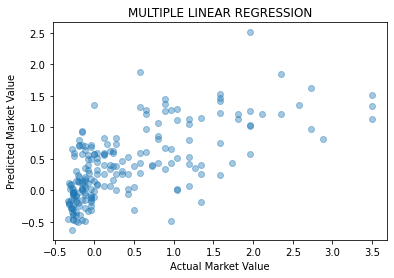

In [1701]:
# X_new = np.array([[-1.5], [4]])
# plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.scatter(y_test_scaled, y_predict, alpha=0.4)
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

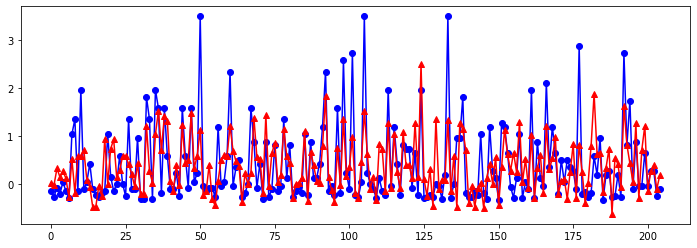

In [1702]:
fig = plt.figure(figsize= (12, 4))
graph = fig.add_subplot(1, 1, 1)
graph.plot(y_test_scaled, marker = 'o', color = 'blue', label = "real")
graph.plot(y_predict, marker = '^', color='red', label = 'prediction')

In [1703]:
regression_scores(y_test_scaled, y_predict)

{'MSE': 0.379, 'RMSE': 0.616, 'MAE': inf, 'R2': 0.438}

## LGBMRegressor

In [1704]:
lgbm = LGBMRegressor(max_depth=3,
                    n_estimators= 100,
                    learning_rate= 0.1,
                    random_state= 5
                    )

lgbm.fit(x_train_scaled, y_train_scaled)

LGBMRegressor(max_depth=3, random_state=5)

In [1709]:
# 모델 성능 평가
y_pred = lgbm.predict(x_test_scaled)
regression_scores(y_test_scaled, y_pred)

{'MSE': 0.361, 'RMSE': 0.601, 'MAE': inf, 'R2': 0.464}

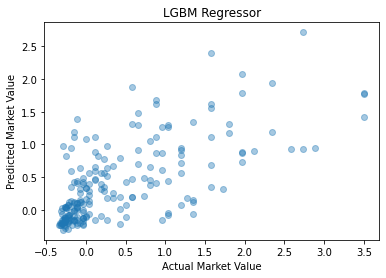

In [1712]:
# X_new = np.array([[-1.5], [4]])
# plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.scatter(y_test_scaled, y_pred, alpha=0.4)
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("LGBM Regressor")
plt.show()

## Lasso 회귀

In [1706]:
lasso = Lasso(alpha=0.02).fit(x_train_scaled, y_train_scaled)

y_pred = lasso.predict(x_test_scaled)
regression_scores(y_test_scaled, y_pred)

{'MSE': 0.382, 'RMSE': 0.618, 'MAE': inf, 'R2': 0.434}

## Ridge 회귀

In [1707]:
ridge = Ridge(alpha=0.01).fit(x_train_scaled, y_train_scaled)

y_pred = ridge.predict(x_test_scaled)
regression_scores(y_test_scaled, y_pred)

{'MSE': 0.379, 'RMSE': 0.616, 'MAE': inf, 'R2': 0.438}

## xgboost 모델

In [1708]:
xgb_model = xgboost.XGBRegressor(n_estimators=150, learning_rate=0.01, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(x_train_scaled, y_train_scaled)
y_pred = xgb_model.predict(x_test_scaled)
regression_scores(y_test_scaled, y_pred)

{'MSE': 0.372, 'RMSE': 0.61, 'MAE': inf, 'R2': 0.447}